In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
def proba_herd(N, mu, c, L):
    alpha = L/(c+L)
    R0=3
    beta = ((1-1/R0)**2)/2
    return(np.exp(-mu*N*alpha*beta))

def time_herd(N, c, L):
    return((N/(c+L))*(2/3))

def proba_days(t, N, mu, c, L):
    return(np.exp((-mu*L*(c+L)*t*t)/(2*N)))

In [53]:
time_herd(8e9, 3000*8e3, 250*8e3)

205.1282051282051

In [56]:
1-proba_herd(8e9, 1e-8, 3000*8e3, 250*8e3)

0.7452624214707242

In [42]:
TH_A_c1 = time_herd(1e8, 100000, 20000)
TH_A_c2 = time_herd(1e8, 1000000, 20000)
P_A_c1 = np.array([1-proba_days(t, 1e8, 1e-7, 100000, 20000) for t in range(1400)])
P_A_c1[int(TH_A_c1):] = P_A_c1[int(TH_A_c1)]
P_A_c2 = np.array([1-proba_days(t, 1e8, 1e-7, 1000000, 20000) for t in range(1400)])
P_A_c2[int(TH_A_c2):] = P_A_c2[int(TH_A_c2)]

In [43]:
P_B = np.array([1-proba_days(100, N, 1e-7, 1000e-6*N, 200e-6*N) for N in np.linspace(1e7,1e9)])
P_C = np.array([1-proba_days(100, 1e8, 1e-7, 1000e-6*1e8, l*1e-6*1e8) for l in np.linspace(100,500)])
P_D = np.array([1-proba_days(100, 1e8, 1e-7, c*1e-6*1e8, 200e-6*1e8) for c in np.linspace(1000,5000)])
P_E = np.array([1-proba_herd(1e8, 1e-7, 1000e-6*1e8, l*1e-6*1e8) for l in np.linspace(100,500)])
P_F = np.array([1-proba_herd(1e8, 1e-7, c*1e-6*1e8, 200e-6*1e8) for c in np.linspace(1000,5000)])

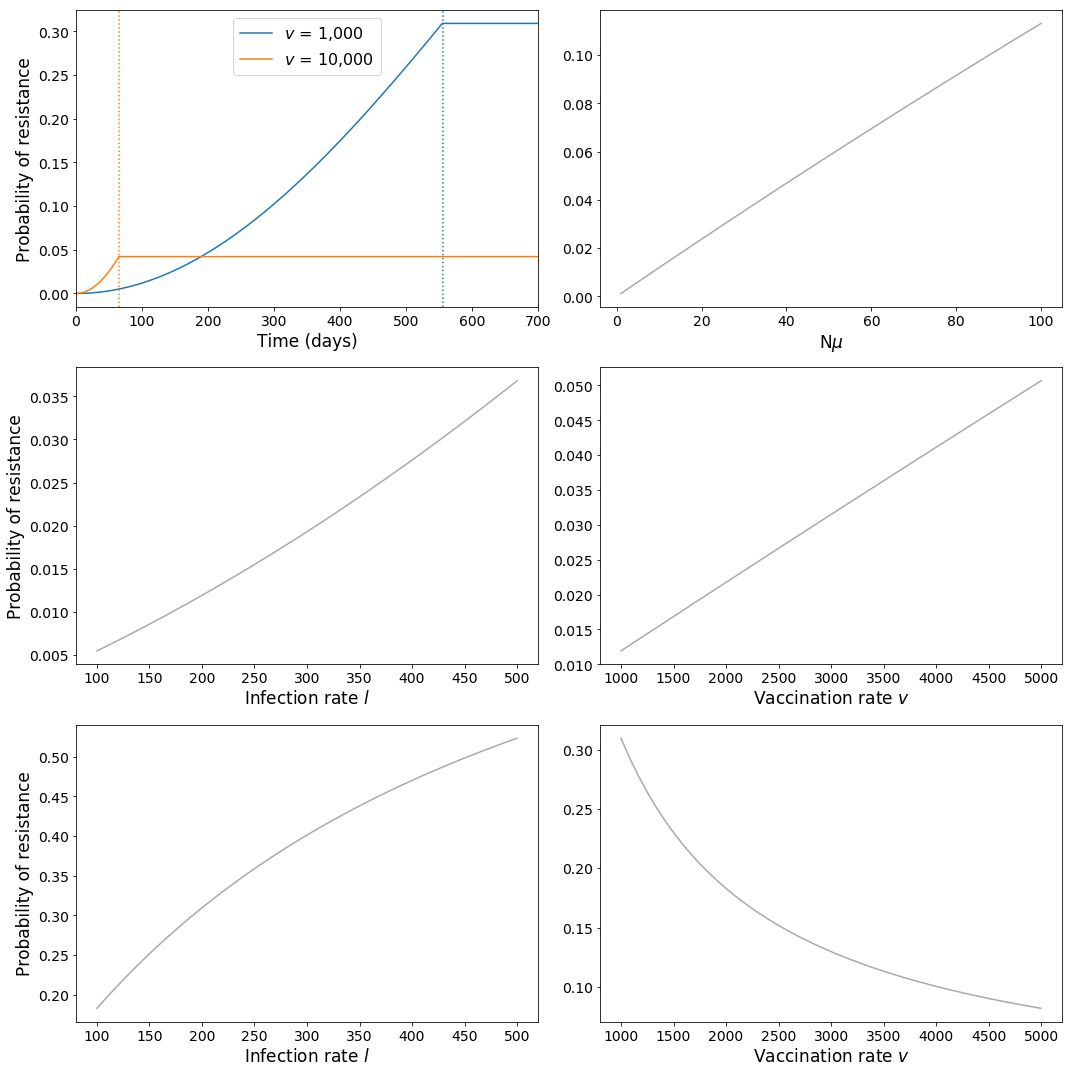

In [48]:
fig, ax = plt.subplots(3,2,figsize=(15,15))

ax[0,0].plot(P_A_c1, c = 'C0')
ax[0,0].plot(P_A_c2, c = 'C1')
ax[0,0].axvline(TH_A_c1, c = 'C0', linestyle ='dotted')
ax[0,0].axvline(TH_A_c2, c = 'C1', linestyle ='dotted')
ax[0,0].set_xlim(0,700)
ax[0,0].legend(['$v$ = 1,000','$v$ = 10,000'], fontsize=16)

ax[0,1].plot(np.linspace(1e7,1e9)*1e-7, P_B, c = 'darkgrey')
ax[1,0].plot(np.linspace(100,500), P_C, c = 'darkgrey')
ax[1,1].plot(np.linspace(1000,5000), P_D, c = 'darkgrey')
ax[2,0].plot(np.linspace(100,500), P_E, c = 'darkgrey')
ax[2,1].plot(np.linspace(1000,5000), P_F, c = 'darkgrey')

ax[0,0].set_xlabel('Time (days)', fontsize = 17)
ax[0,1].set_xlabel('N$\mu$', fontsize = 17)
ax[1,0].set_xlabel('Infection rate $l$', fontsize = 17)
ax[2,0].set_xlabel('Infection rate $l$', fontsize = 17)

ax[1,1].set_xlabel('Vaccination rate $v$', fontsize = 17)
ax[2,1].set_xlabel('Vaccination rate $v$', fontsize = 17)

for i in range(3):
    for j in range(2):
        ax[i,0].set_ylabel('Probability of resistance', fontsize = 17)
        ax[i,j].tick_params(labelsize = 14)

plt.tight_layout()
plt.savefig('herd_effect_JUNE.jpg', dpi=400)

In [32]:
proba_herd(8e9, 1e-8, 5000*8e3, 100*8e3)

0.29431327904628246

In [9]:
def proba_days(t, N, mu, c, L):
    return(1-np.exp((-mu*L*(c+L)*t*t)/(2*N)))

In [21]:
proba_days(50, 1e9, 1e-7, 1000*1e3, 100*1e3)

0.013655900532955956

In [13]:
proba_herd(212.6e6, 1e-7, 1000*1e2, 100*1e2)

0.18292157885926874